## PCA(主成分分析)  
PCA(Principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据降维算法。PCA的主要思想是将n维特征映射到k维上，这k维是全新的正交特征也被称为主成分，是在原有n维特征的基础上重新构造出来的k维特征。PCA的工作就是从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数据本身是密切相关的。其中，第一个新坐标轴选择是原始数据中方差最大的方向，第二个新坐标轴选取是与第一个坐标轴正交的平面中使得方差最大的，第三个轴是与第1,2个轴正交的平面中方差最大的。依次类推，可以得到n个这样的坐标轴。通过这种方式获得的新的坐标轴，我们发现，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。于是，我们可以忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴。事实上，这相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，实现对数据特征的降维处理。  

### PCA算法实现得两种方法  
#### 1、基于特征值分解协方差矩阵实现PCA算法  
输入：数据集$X=${$x_1,x_2,x_3,...,x_n$}，需要降到k维。  
>1）去平均化（即去中心化），即每一位特征减去各自得平均值。  
2）计算协方差矩阵$\frac{1}{n}XX^T$,注：这里除或不除样本数量n或n-1，其实对求出的特征向量没有影响。  
3）用特征值分解的方法求协方差矩阵$\frac{1}{n}XX^T$的特征值与特征向量。  
4）对特征值从大到小排序，选择其中最大的k个。然后将其对应的k个特征向量分别作为行向量组成特征向量矩阵P。  
5）将数据转换到k个特征向量构建的新空间中，即Y=PX。  
如果通过特征值分解协方差矩阵，那么只能得到一个方向的PCA降维。这个方向就是对数据矩阵X从行(或列)方向上降维压缩。  

#### 2、基于SVD分解协方差矩阵实现PCA算法  
输入：数据集$X=${$x_1,x_2,x_3,...,x_n$}，需要降到k维。  
>1）去平均化（即去中心化），即每一位特征减去各自得平均值。  
2）计算协方差矩阵。  
3）通过SVD计算协方差矩阵的特征值与特征向量。  
4）对特征值从大到小排序，选择其中最大的k个。然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。  
5）将数据转换到k个特征向量构建的新空间中。  

在PCA降维中，我们需要找到样本的协方差矩阵$XX^T$的最大k个特征向量，然后用这最大的k个特征向量组成的矩阵来做低维投影降维。可以看出，在这个过程中需要先求出协方差矩阵$XX^T$，当样本数量多、样本特征数也多的时候，这个计算还是很大的。当用SVD分解协方差矩阵的时候，SVD有两个好处：  
>1）有一些SVD的实现算法可以先不求出协方差矩阵$XX^T$也能求出右奇异矩阵V。也就是说，PCA算法可以不用做特征分解而是通过SVD来完成，这个方法在样本量很大的时候很有效。实际上，scikit-learn的PCA算法的背后真正的实现就是用的SVD，而不是特征值分解。  
2）在上面PCA仅仅使用了SVD的左奇异矩阵，没有使用到右奇异值矩阵，那么右奇异值矩阵有什么用呢？  
>>假设我们的样本是m*n的矩阵X，如果我们通过SVD找到了矩阵$XX^T$最大的k个特征向量组成的n\*k的矩阵$V^T$,则我们可以做如下处理：  
>>$$X_{m*k}^{'}=X_{m*n}V_{n*k}^{T}$$  
>>可以得到一个m*k的矩阵X',这个矩阵和我们原来m*n的矩阵X相比，列数从n减到了k，可见对列数进行了压缩。也就是说，左奇异矩阵可以用于对行数的压缩；右奇异矩阵可以用于对列(即特征维度)的压缩。这就是我们用SVD分解协方差矩阵实现PCA可以得到两个方向的PCA降维(即行和列两个方向)。  

有时候，我们不指定降维后的k值，，二十2换一种方式，指定一个降维到的主成分比重阈值t。这个阈值在(0,1]之间。假如有n个特征值为$\lambda_1 \geq \lambda_2 \geq \lambda_3 ... \geq \lambda_n$，则k值可以通过下式得到：  
$$\frac{\sum_{i=1}^{k}{\lambda_i}}{\sum_{i=1}^{n}{\lambda_i}} \geq t$$  

### 总结  
PCA作为一个非监督学习的降维方法，它只需要特征值分解，就可以对数据进行压缩，去噪。因此在实际场景应用很广泛。为了克服PCA的一些缺点，出现了很多PCA的变种，比如第六节的为解决非线性降维的KPCA，还有解决内存限制的增量PCA方法Incremental PCA，以及解决稀疏数据降维的PCA方法Sparse PCA等。  
##### PCA算法的主要优点有：
1）仅仅需要以方差衡量信息量，不受数据集以外的因素影响。  
2）各主成分之间正交，可消除原始数据成分间的相互影响的因素。  
3）计算方法简单，主要运算是特征值分解，易于实现。  
##### PCA算法的主要缺点有：
1）主成分各个特征维度的含义具有一定的模糊性，不如原始样本特征的解释性强。  
2）方差小的非主成分也可能含有对样本差异的重要信息，因降维丢弃可能对后续数据处理有影响。  

### 参考文献  
https://zhuanlan.zhihu.com/p/37777074  
https://www.cnblogs.com/pinard/p/6239403.html  
https://github.com/heucoder/dimensionality_reduction_alo_codes/blob/master/codes/PCA/PCA.py

In [1]:
#代码实现
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [8]:
#代码实现
def pca(data, n_dim): #O(n^3)
    """
    data:(n_samples, n_features(n))
    n_dim:目标维度
    return:
    (n_samples, n_dim)
    """
    data = data - np.mean(data, axis=0, keepdims=True) #去中心化
    cov = np.dot(data.T, data) #协方差矩阵

    eig_val, eig_vec = np.linalg.eig(cov) #特征值、特征向量
    
    #将特征值、特征向量从大到小排序
    index_ = np.argsort(-eig_val)[:n_dim]

    eig_vals = eig_val[index_]
    eig_vecs = eig_vec[:,index_]
    data_ndim = np.dot(data, eig_vecs)
    return data_ndim

In [4]:
def highdim_pca(data, n_dim): #n_features >> n_samples, O(m^3)
    """
    data:(n_samples(m), n_features)
    n_dim:目标维度
    return：
    (n_samples, n_dim)
    """
    m = data.shape[0]
    data = data - np.mean(data, axis=0, keepdims=True)
    mcov = np.dot(data, data.T)

    meig_val, meig_vec = np.linalg.eig(mcov)
    index_ = np.argsort(meig_val)[:n_dim]
    meig_vals = meig_val[index_] #选择后的特征值
    meig_vecs = meig_vec[:,index_]

    eig_vecs = np.dot(data.T, meig_vecs)
    eig_vecs = eig_vecs/(m*meig_vals.reshape(-1, n_dim))**0.5

    data_ndim = np.dot(data, eig_vecs)
    return data_ndim

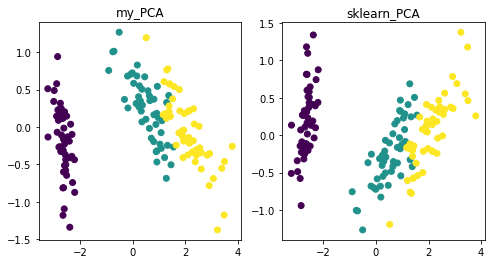

In [9]:
data = load_iris()
X = data.data
Y = data.target
data_2d1 = pca(X, 2)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("my_PCA")
plt.scatter(data_2d1[:, 0], data_2d1[:, 1], c = Y)

sklearn_pca = PCA(n_components=2)
data_2d2 = sklearn_pca.fit_transform(X)
plt.subplot(122)
plt.title("sklearn_PCA")
plt.scatter(data_2d2[:, 0], data_2d2[:, 1], c = Y)
plt.show()